# Final Project 3
Authors and Creators:

  1. Aliza Muslimah
  2. Padmadi Cahyo Wibowo
  3. Tegar Ahmad Arsy

## Objektif
Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble Model sebagai berikut:
1. Machine learning framework yang digunakan adalah Scikit-Learn
2. Ada penggunaan library visualisasi, seperti matplotlib atau seaborn
3. Project dinyatakan selesai dan diterima untuk dinilai jika saat dilakukan Run All
pada notebook, semua cell berhasil tereksekusi sampai akhir.

## Perkenalan
Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang
digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

1. Latar belakang memilih kasus
Ingin memprediksi gagal jantung yang menyebabkan kematian saat melakukan follow up.

2. Data penelitian
Data ini bernama Data heart failure yang diperoleh dari https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data. Data ini digunakan untuk memprediksi apakah pasien meninggal saat follow up. Data ini adalah data gagal jantung . Jumlah dataset ini adalah 299 baris data dengan 13 atribut.
Atribut yang menjadi label kelas yaitu status_meninggal_saat_follup yang berisi "No" (jika pasien tidak meninggal saat melakukan follup) dan "Yes" (pasien meninggal saat melakukan follup).

Nama, penjelasannya, serta data dari atribut yang terdapat pada datasets, adalah sebagai berikut:

**Atribut**
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

## Install dan Import Pustaka yang dibutuhkan

In [1]:
'''Pustaka untuk pengolahan data'''
import pandas as pd
import numpy as np
from scipy import stats


'''Pustaka untuk proses machine learning dan data science'''
# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder #ordinal encoding untuk atribut kategorikal
from sklearn.preprocessing import MinMaxScaler,StandardScaler #scaler for normalization 
from sklearn.preprocessing import OneHotEncoder #one hot encoding nominal atribut
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Chi-Square and Mutual Information feature selection for numeric input and categorical output
from sklearn.feature_selection import mutual_info_classif

# splitting dataset and kfold
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV

# dimensionality reduction
from sklearn.decomposition import PCA

# modelling
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# model performance
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, r2_score, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit


'''Pustaka untuk Visualisasi'''
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


'''Pustaka Pendukung'''
# save models
import pickle



## Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
# Loading data dengan Pandas 
df_ori = pd.read_csv('heart_failure_clinical_records_dataset.csv', skipinitialspace=True)

In [3]:
# Menampilkan sekilas isi data
df_ori

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# Mengetahui dimensi data
df_ori.shape

(299, 13)

In [5]:
# Mengetahui daftar kolom
daftar_kolom = df_ori.columns.values
print(daftar_kolom)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


In [6]:
# Meihat tipe data setiap kolom
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya. 

### Mengecek Missing Values

In [7]:
#cek null values
df_ori.isnull().sum().sort_values() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
#cek missing values
columns = df_ori.columns 
for column in df_ori[columns]:
  print("Nilai unik atribut {} ({} nilai)".format(column.upper(),df_ori[column].nunique()))
  print(f'{column} : {df_ori[column].unique()}')
  print()

Nilai unik atribut AGE (47 nilai)
age : [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]

Nilai unik atribut ANAEMIA (2 nilai)
anaemia : [0 1]

Nilai unik atribut CREATININE_PHOSPHOKINASE (208 nilai)
creatinine_phosphokinase : [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  

In [9]:
# Menghitung statistik deskriptif data 
df_ori.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### **Merename nama kolom**

In [10]:
# rename kolom dari datasets
def rename_columns_df(df):
    df = df.rename(
        columns={
            'age':'umur',
            'anaemia':'status_anemia',
            'creatinine_phosphokinase':'level_enzim_CPK',
            'diabetes':'riwayat_diabetes',
            'ejection_fraction':'persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi',
            'high_blood_pressure':'status_darahtinggi',
            'platelets':'jumlah_platelet',
            'serum_creatinine':'level_creatinine',
            'serum_sodium':'level_sodium',
            'sex':'gender',
            'smoking':'status_merokok',
            'time':'jumlah_hari_untuk_follup',
            'DEATH_EVENT':'status_meninggal_saat_follup'
        },
    )
    return df


In [11]:
# menampilkan 5 data teratas setelah nama kolom direname
df_preclean = rename_columns_df(df_ori)
df_preclean.head()

,umur,status_anemia,level_enzim_CPK,riwayat_diabetes,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,status_darahtinggi,jumlah_platelet,level_creatinine,level_sodium,gender,status_merokok,jumlah_hari_untuk_follup,status_meninggal_saat_follup
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
# Melihat daftar kolom setelah di rename
df_preclean.columns

Index(['umur', 'status_anemia', 'level_enzim_CPK', 'riwayat_diabetes',
       'persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi',
       'status_darahtinggi', 'jumlah_platelet', 'level_creatinine',
       'level_sodium', 'gender', 'status_merokok', 'jumlah_hari_untuk_follup',
       'status_meninggal_saat_follup'],
      dtype='object')

## Eksplorasi Data
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan grouping, visualisasi sederhana, dan lain sebagainya.

In [13]:
df_clean = df_preclean.copy()

### Feature Selection
**Melihat korelasi atribut terhadap atribut target yaitu status_meninggal_saat_follup**

In [14]:
#Memanggil fungsi corr() untuk mencari korelasi
korelasi = df_clean.corr()

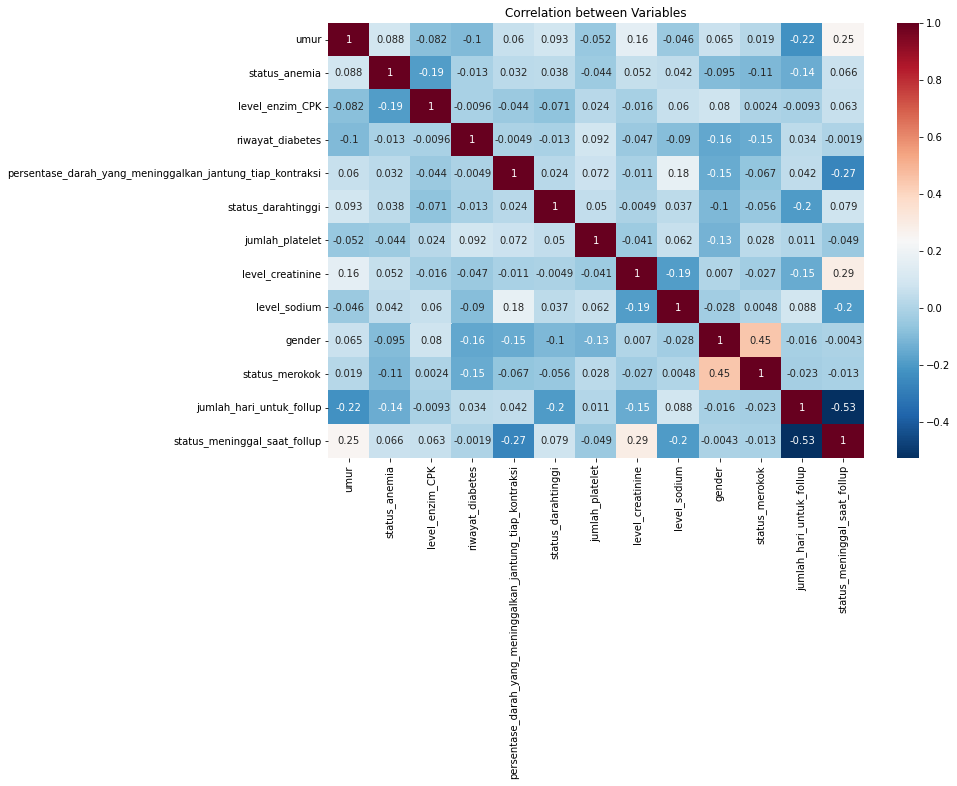

In [15]:
#Visualisasi dari korelasi atribut
plt.figure(figsize=(12,8))
sns.heatmap(korelasi, cmap="RdBu_r",annot=True)

plt.title('Correlation between Variables')
plt.show()


**Dari heatmap diatas dapat diperoleh 5 teratas atribut yang berpengaruh terhadap atribut target. yaitu:**

'umur','persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi', 'level_creatinine','level_sodium','jumlah_hari_untuk_follup'

**Sehingga hanya 5 atribut tersebut yang digunakan**

In [16]:
# menghapus semua atribut kecuali 5 atribut teratas
df_eksplor = df_clean.copy()
drop_cols = ['status_anemia', 'level_enzim_CPK', 'riwayat_diabetes', 'status_darahtinggi', 'jumlah_platelet','gender', 'status_merokok']
df_eksplor.drop(drop_cols, axis=1, inplace=True)


In [17]:
df_eksplor.head()

,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup,status_meninggal_saat_follup
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1


In [18]:
df_eksplor['level_creatinine'].min()

0.5

### Measure of central tendency

In [19]:
# Measure of central tendency dari atribut selain atribut target yang merupakan categorical
df_desc = df_eksplor.drop('status_meninggal_saat_follup', axis=1)
df_desc

,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup
0,75.0,20,1.9,130,4
1,55.0,38,1.1,136,6
2,65.0,20,1.3,129,7
3,50.0,20,1.9,137,7
4,65.0,20,2.7,116,8
...,...,...,...,...,...
294,62.0,38,1.1,143,270
295,55.0,38,1.2,139,271
296,45.0,60,0.8,138,278
297,45.0,38,1.4,140,280


In [20]:
# Nilai rata-rata dari atribut numerikal
mean = df_desc.mean()
mean

umur                                                          60.833893
persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi     38.083612
level_creatinine                                               1.393880
level_sodium                                                 136.625418
jumlah_hari_untuk_follup                                     130.260870
dtype: float64

In [21]:
# Nilai median dari atribut numerikal
median = df_desc.median()
median

umur                                                          60.0
persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi     38.0
level_creatinine                                               1.1
level_sodium                                                 137.0
jumlah_hari_untuk_follup                                     115.0
dtype: float64

In [22]:
# Nilai modus dari semua atribut kecuali atribut target
mode = df_desc.mode()
mode 

,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup
0,60.0,35.0,1.0,136.0,187
1,NaN,NaN,NaN,NaN,250


**Rangkuman Measure of Central Tendency**

In [23]:
df_centraltendency = pd.DataFrame(data={
    'Mean':mean,
    'Median':median
}).transpose()
 
df_centraltendency 

,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup
Mean,60.833893,38.083612,1.39388,136.625418,130.26087
Median,60.000000,38.000000,1.10000,137.000000,115.00000


**ANALISIS PERHITUNGAN TENDENSI SENTRAL**

1. Semua atribut bertipe numerikal. maka memiliki nilai mean, median, dan modus yang hampir sama (selisihnya cukup kecil). Hal ini bisa menandakan bahwa distribusi data tersebut cenderung simetris.
2. dapat dilihat pada tabel diatas perbedaan yang cukup signifikan bernilai 15 pada kolom jumlah hari untuk follup.

### Menghitung measure of spread (variability)

In [24]:
# Nilai Simple Varians (ddof=1)

df_desc.var(ddof=1).sort_values()

level_creatinine                                                1.070211
level_sodium                                                   19.469956
persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi     140.063455
umur                                                          141.486483
jumlah_hari_untuk_follup                                     6023.965276
dtype: float64

In [25]:
#Sampel Standard Deviation

df_desc.std(ddof=1).sort_values()

level_creatinine                                              1.034510
level_sodium                                                  4.412477
persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi    11.834841
umur                                                         11.894809
jumlah_hari_untuk_follup                                     77.614208
dtype: float64

In [26]:
#Nilai skewness

df_desc.skew().sort_values(ascending=False)

level_creatinine                                             4.455996
persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi    0.555383
umur                                                         0.423062
jumlah_hari_untuk_follup                                     0.127803
level_sodium                                                -1.048136
dtype: float64

In [27]:
#Percentiles

# menghitung kuartile 1,2, dan 3
Q1,Q2, Q3 = df_desc.quantile(0.25), df_desc.quantile(0.5),df_desc.quantile(0.75)

# menghitung IQR (selisih dari Q3 dengan Q1)
IQR = Q3-Q1 

In [28]:
#Ranges

max_ = df_desc.max()
min_ = df_desc.min() 
ranges =  max_ - min_

**Rangkuman Measure of Variability**

In [29]:
df_clean_variability = pd.DataFrame(data={
    'Q1':Q1,
    'Q2':Q2,
    'Q3':Q3,
    'IQR':IQR,
    'Maximum':max_,
    'Minimum':min_,
    'Ranges':ranges
}).transpose()

In [30]:
df_clean_variability

,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup
Q1,51.0,30.0,0.9,134.0,73.0
Q2,60.0,38.0,1.1,137.0,115.0
Q3,70.0,45.0,1.4,140.0,203.0
IQR,19.0,15.0,0.5,6.0,130.0
Maximum,95.0,80.0,9.4,148.0,285.0
Minimum,40.0,14.0,0.5,113.0,4.0
Ranges,55.0,66.0,8.9,35.0,281.0


 ANALISIS PENGUKURAN SEBARAN DATA (Measure of Spread)

dapat dilihat pada tabel diatas bahwa terdapat range terbesar dimiliki oleh atribut jumlah_hari_untuk_follup sebesar 281.0





### Eksplorasi Atribut Target

In [31]:
df_eksplor.head()

,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup,status_meninggal_saat_follup
0,75.0,20,1.9,130,4,1
1,55.0,38,1.1,136,6,1
2,65.0,20,1.3,129,7,1
3,50.0,20,1.9,137,7,1
4,65.0,20,2.7,116,8,1


In [32]:
#melihat banyak setiap nilai pada label kelas/target 
df_eksplor['status_meninggal_saat_follup'].value_counts()

0    203
1     96
Name: status_meninggal_saat_follup, dtype: int64

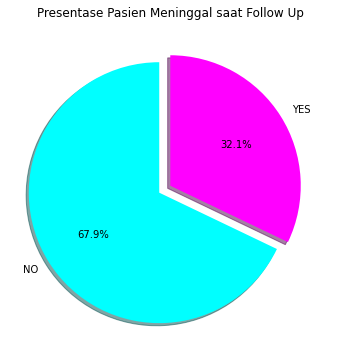

In [33]:
# Melihat presentase target
label = df_eksplor['status_meninggal_saat_follup'].values
explode = [0.1,0]
y = df_eksplor['status_meninggal_saat_follup'].value_counts()
label = ['NO','YES']
plt.figure(figsize=(6,6))
plt.pie(y, labels= label,
        colors=('aqua','magenta'),
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        explode=explode
        )
plt.title('Presentase Pasien Meninggal saat Follow Up')
plt.show()

## Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan

In [34]:
df_prepro = df_eksplor.copy()

### Balancing data target
Dari pie chart,dapat diketahui bahwa data target imbalanced, sehingga perlu melakukan balancing data. Balancing data dapat digunakan dengan menggunakan undersampling. metode ini juga digunakan untuk mengurangi training time.

In [35]:
# Undersampling
# jumlah sampel untuk diundersampling
jml_sampel = 90

# under-sampling kelas 'No' agar jumlahnya sama dengan kelas 'Yes' sebesar n_sampel
df_no = df_prepro[df_prepro['status_meninggal_saat_follup']==0].sample(frac=1, random_state=42)[:jml_sampel]
df_yes = df_prepro[df_prepro['status_meninggal_saat_follup']==1].sample(frac=1, random_state=42)[:jml_sampel]

# concat data berlabel 'yes' dan 'no' hasil balanced sampling
df_concat = pd.concat([df_yes,df_no])

# shuffle row pada data yang sudah digabung agar acak
df_balance = df_concat.sample(frac=1, random_state=42)

In [36]:
#melihat banyak setiap nilai pada label kelas/target setelah undersampling
df_balance['status_meninggal_saat_follup'].value_counts()

1    90
0    90
Name: status_meninggal_saat_follup, dtype: int64

### Train-test-split

In [37]:
df_balance.head()

,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup,status_meninggal_saat_follup
186,50.0,50,0.60,134,172,1
30,94.0,38,1.83,134,27,1
97,70.0,60,1.10,136,85,0
182,65.0,25,1.20,136,154,1
207,85.0,38,0.90,136,187,0


In [38]:
#Mereset index menjadi index baru
df_balance = df_balance.reset_index(drop=True)
df_balance.head()

,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup,status_meninggal_saat_follup
0,50.0,50,0.60,134,172,1
1,94.0,38,1.83,134,27,1
2,70.0,60,1.10,136,85,0
3,65.0,25,1.20,136,154,1
4,85.0,38,0.90,136,187,0


In [39]:

# split atribut dan target
x, y = df_balance.drop('status_meninggal_saat_follup', axis = 1), df_balance['status_meninggal_saat_follup']


In [40]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)


In [41]:
x_train.head()

,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup
138,55.0,20,1.83,134,241
19,50.0,30,1.20,136,32
145,64.0,60,1.00,137,113
149,60.0,25,1.70,140,120
164,51.0,40,0.90,134,244


## Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu.

Classification dengan Ensemble Model
*   Metode ensemble atau metode ansamble adalah algoritma dalam pembelajaran mesin (machine learning) dimana algoritma ini sebagai pencarian solusi prediksi terbaik dibandingkan dengan algoritma yang lain karena metode ensemble ini menggunakan beberapa algoritma pembelajaran untuk pencapaian solusi prediksi yang lebih baik daripada algoritma yang bisa diperoleh dari salah satu pembelajaran algoritma kosituen saja.

Ada beberapa jenis metode ensemble yaitu:


*   Bagging
*   Boosting
*   Stacking



### Ensemble


#### **1. Ensemble Voting Regression**

another my model | Voting Reggression, using soft voting




In [42]:
# import package yang dibutuhkan 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [43]:
import pandas as pd
classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()
               ]]

predictions_df=pd.DataFrame()

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train, y_train.ravel())
    predictions = classifier.predict(x_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

Neural Network : 0.6851851851851852
LogisticRegression : 0.8333333333333334
ExtraTreesClassifier : 0.8333333333333334
DecisionTree : 0.7777777777777778
RandomForest : 0.7777777777777778
Naive Bayes : 0.7592592592592593
KNeighbours : 0.8333333333333334
SVM : 0.7962962962962963
AdaBoostClassifier : 0.8148148148148148
GradientBoostingClassifier:  0.8148148148148148


Dipilih 3 model terbaik, yaitu:
1.   ExtraTreesClassifier
2.   LogisticRegression
3.   KNeighborsClassifier

In [44]:

# Soft voting
from sklearn.ensemble import VotingClassifier
clf1 =  ExtraTreesClassifier()
clf2 = LogisticRegression()
clf3 = KNeighborsClassifier()
eclf1 = VotingClassifier(estimators=[('ExtraTreesClassifier', clf1), ('Logistic', clf2), ('KNN', clf3)], voting='soft')


In [45]:
# Hard voting
from sklearn.ensemble import VotingClassifier
clf1 =  ExtraTreesClassifier()
clf2 = LogisticRegression()
clf3 = KNeighborsClassifier()
eclf2 = VotingClassifier(estimators=[('ExtraTreesClassifier', clf1), ('Logistic', clf2), ('KNN', clf3)], voting='hard')


## Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [46]:
#Soft Voting
eclf1.fit(x_train, y_train)

VotingClassifier(estimators=[('ExtraTreesClassifier', ExtraTreesClassifier()),
                             ('Logistic', LogisticRegression()),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

In [47]:
#Hard Voting
eclf2.fit(x_train, y_train)

VotingClassifier(estimators=[('ExtraTreesClassifier', ExtraTreesClassifier()),
                             ('Logistic', LogisticRegression()),
                             ('KNN', KNeighborsClassifier())])

## Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model

In [48]:
#Soft Voting
predictions = eclf1.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.86      0.86      0.86        29

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



In [49]:
#Hard Voting
predictions = eclf2.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.83      0.86      0.85        29

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



Di sini kami mendapatkan score pada model Soft Voting Classifier adalah 0.85 dan pada model Hard Voting Classifier adalah 0.83

## Model Inference
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

In [50]:
x_test.shape

(54, 5)

In [51]:


data = [[55.0,20.0,18.3,134.0,241.0]]
kolom = ['umur', 'persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi', 'level_creatinine', 'level_sodium', 'jumlah_hari_untuk_follup']
data = pd.DataFrame(data = data, columns=kolom)
data


,umur,persentase_darah_yang_meninggalkan_jantung_tiap_kontraksi,level_creatinine,level_sodium,jumlah_hari_untuk_follup
0,55.0,20.0,18.3,134.0,241.0


In [52]:

eclf1.predict(data)

array([1])

In [53]:
print('Hasil Prediksi dengan Voting Classifier : ', eclf1.predict([[20.0,20.0,1.0,140.0,10.0]]))

Hasil Prediksi dengan Voting Classifier :  [1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Dari program diatas maka diperoleh Prediksi [1] yang berarti bahwa pasien meninggal saat di follow up.

## Pengambilan Kesimpulan
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil
yang didapat dengan dibandingkan dengan objective yang sudah ditulis di
bagian pengenalan. 

model prediksi Pasien gagal jantung dibentuk dengan menggunakan 5 faktor yang mempengaruhi yaitu umur, presentase darah yg meninggalkan jantung tiap kontraksi, level creatinine, level sodium, jumlah hari untuk follup. Berdasarkan atribut-atribut tersebut model score yang diperoleh sebesar 0.85


maka dapat disimpulkan hasil score yang diperoleh dari model yang dipilih relatif tinggi.

In [54]:
# Menyimpan model Voting Classifier di pickle
pickle.dump(eclf1, open('./model_classifier_voting.pkl','wb'))